What I'd like to do here is some sort of abundance by depth look at the arctic cod vs pollock which can later be lined up with the CTD data. I didn't have this in mind when I was making the original spreadhseets since it's not something that was done in 2012 and 2013. My guess is that at the 5m resolution of the depth bins, I will not be able to distinguish anything.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# This actually builds the datafiles, so skip unless using new mba catch results
b = pd.read_csv('../../data/catchData/2017_2019/mbaCatchResults_2017.csv')
b = b[(b.SPECIES_CODE == 21725) | (b.SPECIES_CODE == 21744) | (b.SPECIES_CODE == 21740)][['SURVEY','INTERVAL','END_LATITUDE','END_LONGITUDE','SPECIES_CODE','LAYER','NUMBERS','NUMBERS_NM2']]
b = b.groupby(['SURVEY','INTERVAL','END_LATITUDE','END_LONGITUDE','SPECIES_CODE','LAYER']).sum().reset_index()
df17mb = b
b = pd.read_csv('../../data/catchData/2017_2019/mbaCatchResults_2019.csv')
b = b[(b.SPECIES_CODE == 21725) | (b.SPECIES_CODE == 21744) | (b.SPECIES_CODE == 21740)][['SURVEY','INTERVAL','END_LATITUDE','END_LONGITUDE','SPECIES_CODE','LAYER','NUMBERS','NUMBERS_NM2']]
b = b.groupby(['SURVEY','INTERVAL','END_LATITUDE','END_LONGITUDE','SPECIES_CODE','LAYER']).sum().reset_index()
df19mb = b


from geopy.distance import distance
a = pd.read_csv('analysisFiles/dfStat.csv')
a = a[a.Year == 2019][['latitude','longitude','T_surf','T_bot']]


df = df17mb
a['longitude'] = (360-a.longitude)*-1
ss,sb = [],[]
for indexi, rowi in df.iterrows():
    dcur=1000
    for indexc, rowc in a.iterrows():
        try:
            try:
                if distance((rowi.END_LATITUDE,rowi.END_LONGITUDE),(rowc.latitude,rowc.longitude)).km < dcur:
                    dcur = distance((rowi.END_LATITUDE,rowi.END_LONGITUDE),(rowc.latitude,rowc.longitude)).km
                    sscur = rowc.T_surf
                    sbcur = rowc.T_bot
            except:
                if distance((rowi.END_LATITUDE,rowi.END_LONGITUDE),(rowc.latitude,rowc.longitude)).km < dcur:
                    dcur = distance((rowi.END_LATITUDE,rowi.END_LONGITUDE),(rowc.latitude,rowc.longitude)).km
                    sscur = rowc.T_surf
                    sbcur = rowc.T_bot
        except:
            dcur = 1000
            sscur = np.nan
            sbcur = np.nan
    ss.append(sscur)
    sb.append(sbcur)
df['T_surf'] = ss
df['T_bot'] = sb
#b = pd.merge(df19, df19i,  how='left', left_on=['Process_ID', 'Interval'], right_on =['Process_ID', 'Interval'])
df.to_csv('analysisFiles/mbaEnv17.csv')

C:\Users\rober\Anaconda3\lib\site-packages\geopy\point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


In [14]:
df17 = pd.read_csv('analysisFiles/mbaEnv17.csv')
df19 = pd.read_csv('analysisFiles/mbaEnv19.csv')

In [15]:
temp = 2
df19[df19.T_bot >temp ].NUMBERS.sum()/df19.NUMBERS.sum()

0.22125895668551152

In [16]:
df17[df17.T_bot >temp ].NUMBERS.sum()/df17[df17.T_bot <temp ].NUMBERS.sum()

1.3617106341160958

In [17]:
np.cumsum((df19[df19.T_bot >temp ].groupby(['LAYER']).sum().NUMBERS[:9]/df19[df19.T_bot >temp ].groupby(['LAYER']).sum().NUMBERS[:9].sum()))

LAYER
2     0.017814
3     0.083585
4     0.189810
5     0.282986
6     0.372765
7     0.474906
8     0.674559
9     0.905157
10    1.000000
Name: NUMBERS, dtype: float64

In [18]:
np.cumsum((df17[df17.T_bot <temp ].groupby(['LAYER']).sum().NUMBERS[:9]/df17[df17.T_bot <temp ].groupby(['LAYER']).sum().NUMBERS[:9].sum()))

LAYER
2     0.032178
3     0.140712
4     0.317171
5     0.551021
6     0.710362
7     0.816810
8     0.908706
9     0.968622
10    1.000000
Name: NUMBERS, dtype: float64

Text(0.5, 0.02, 'Total Abundance')

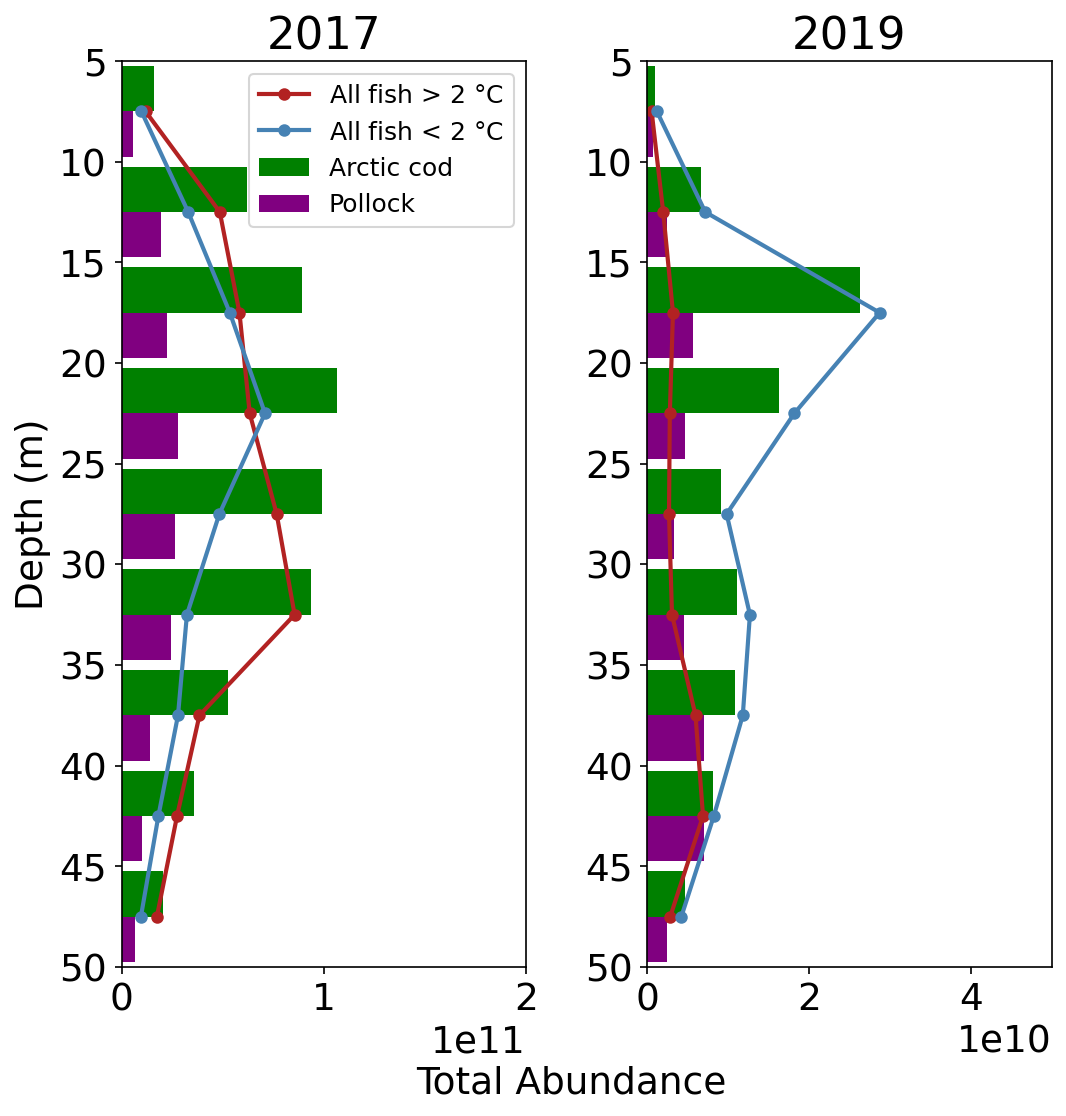

In [19]:
fig = plt.figure(figsize=(8,8),dpi=150)
plt.rcParams.update({'font.size': 18})
width = .45
temp = 2

plt.subplot(121)
df17A = df17[df17.SPECIES_CODE == 21725]
plt.barh(df17A.groupby(['LAYER']).sum().index- width/2,df17A.groupby(['LAYER']).sum().NUMBERS,width,color = 'green')
df17A = df17[df17.SPECIES_CODE != 21725]
plt.barh(df17A.groupby(['LAYER']).sum().index+ width/2,df17A.groupby(['LAYER']).sum().NUMBERS,width,color = 'purple')

dfA = df17[df17.T_bot >temp ]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'firebrick',linewidth=2,markersize=10)
dfA = df17[df17.T_bot <temp ]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'steelblue',linewidth=2,markersize=10)


plt.axis([0,2E11,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
plt.ylabel('Depth (m)')
plt.title('2017')
plt.legend(['All fish > '+str(temp)+' $\degree$C','All fish < '+str(temp)+' $\degree$C','Arctic cod','Pollock'],fontsize=12)

plt.subplot(122)
df19A = df19[df19.SPECIES_CODE == 21725]
plt.barh(df19A.groupby(['LAYER']).sum().index- width/2,df19A.groupby(['LAYER']).sum().NUMBERS,width,color = 'green')
df19A = df19[df19.SPECIES_CODE != 21725]
plt.barh(df19A.groupby(['LAYER']).sum().index+ width/2,df19A.groupby(['LAYER']).sum().NUMBERS,width,color = 'purple')

dfA = df19[df19.T_bot >temp ]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'firebrick',linewidth=2,markersize=10)
dfA = df19[df19.T_bot <temp ]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'steelblue',linewidth=2,markersize=10)

plt.axis([0,5E10,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
plt.title('2019')

#plt.subplot(133)
#dfAll = pd.concat([df17,df19])
#dfA = dfAll[dfAll.T_bot >temp ]
#plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS,dfA.groupby(['LAYER']).sum().index,color = 'salmon')
#dfA = dfAll[dfAll.T_bot <temp ]
#plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS,dfA.groupby(['LAYER']).sum().index,color = 'steelblue')

#plt.axis([0,2E11,5,10.5])
#plt.gca().invert_yaxis()
#plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
#plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])

plt.subplots_adjust(wspace=0.3)
fig.text(0.5, 0.02, 'Total Abundance', ha='center')

Text(0.5, 0.02, 'Total Abundance')

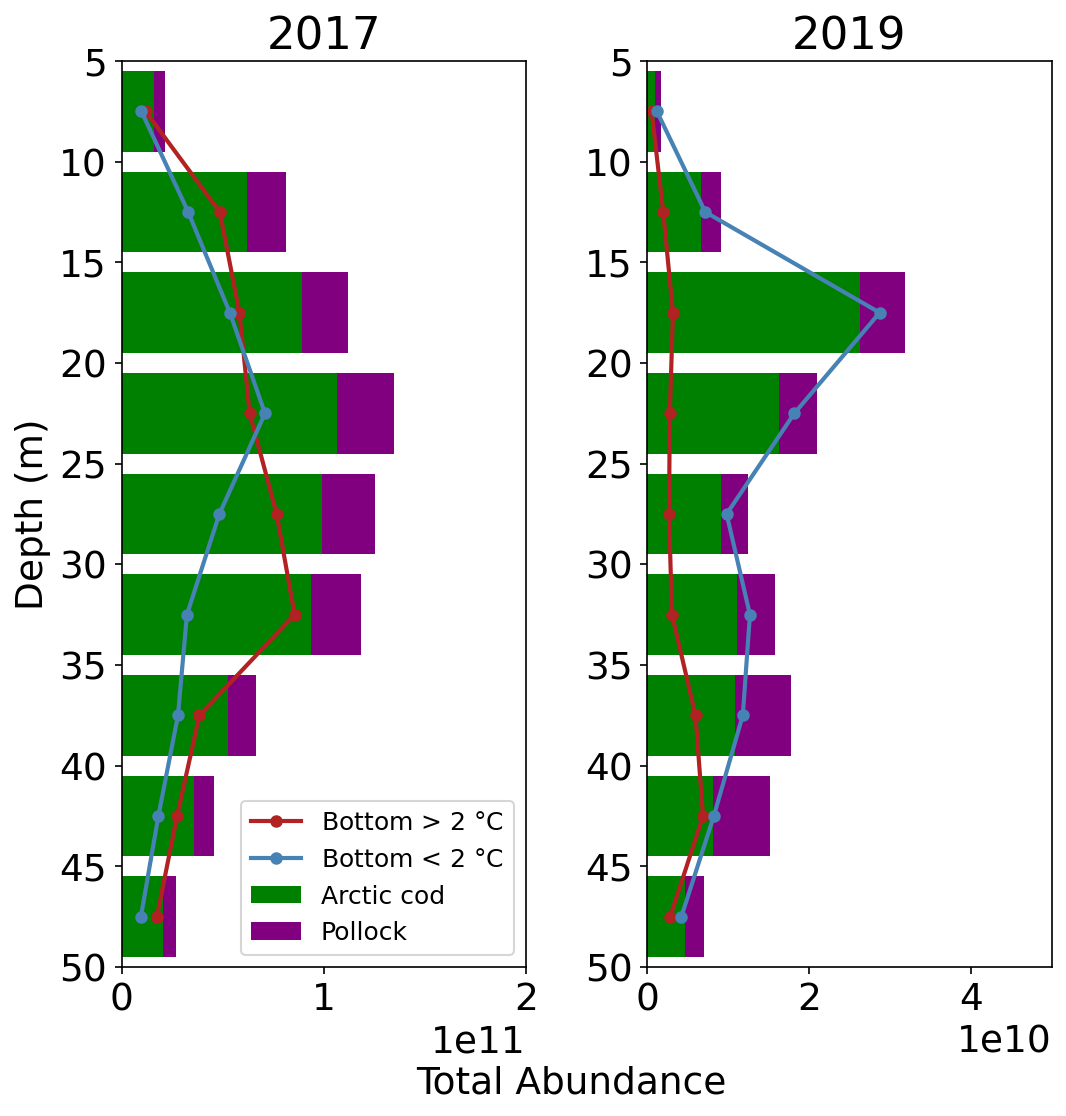

In [4]:
fig = plt.figure(figsize=(8,8),dpi=150)
plt.rcParams.update({'font.size': 18})
width = .45
temp = 2

plt.subplot(121)

df17A = df17[df17.SPECIES_CODE == 21725]
plt.barh(df17A.groupby(['LAYER']).sum().index,df17A.groupby(['LAYER']).sum().NUMBERS,color = 'green')
df17P = df17[df17.SPECIES_CODE != 21725]
plt.barh(df17P.groupby(['LAYER']).sum().index,df17P.groupby(['LAYER']).sum().NUMBERS,left = df17A[df17A.LAYER.isin(df17P.groupby(['LAYER']).sum().index)].groupby(['LAYER']).sum().NUMBERS,color = 'purple',)


dfA = df17[df17.T_bot >temp ]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'firebrick',linewidth=2,markersize=10)
dfA = df17[df17.T_bot <temp ]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'steelblue',linewidth=2,markersize=10)

plt.axis([0,2E11,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
plt.ylabel('Depth (m)')
plt.title('2017')

plt.legend(['Bottom > '+str(temp)+' $\degree$C','Bottom < '+str(temp)+' $\degree$C','Arctic cod','Pollock'],fontsize=12)

plt.subplot(122)
df19A = df19[df19.SPECIES_CODE == 21725]
plt.barh(df19A.groupby(['LAYER']).sum().index,df19A.groupby(['LAYER']).sum().NUMBERS,color = 'green')
df19P = df19[df19.SPECIES_CODE != 21725]
plt.barh(df19P.groupby(['LAYER']).sum().index,df19P.groupby(['LAYER']).sum().NUMBERS,left = df19A[df19A.LAYER.isin(df19P.groupby(['LAYER']).sum().index)].groupby(['LAYER']).sum().NUMBERS,color = 'purple',)


dfA = df19[df19.T_bot >temp ]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'firebrick',linewidth=2,markersize=10)
dfA = df19[df19.T_bot <temp ]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'steelblue',linewidth=2,markersize=10)

plt.axis([0,5E10,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
plt.title('2019')


plt.subplots_adjust(wspace=0.3)
fig.text(0.5, 0.02, 'Total Abundance', ha='center')

Text(0.5, -0.01, 'Total Abundance')

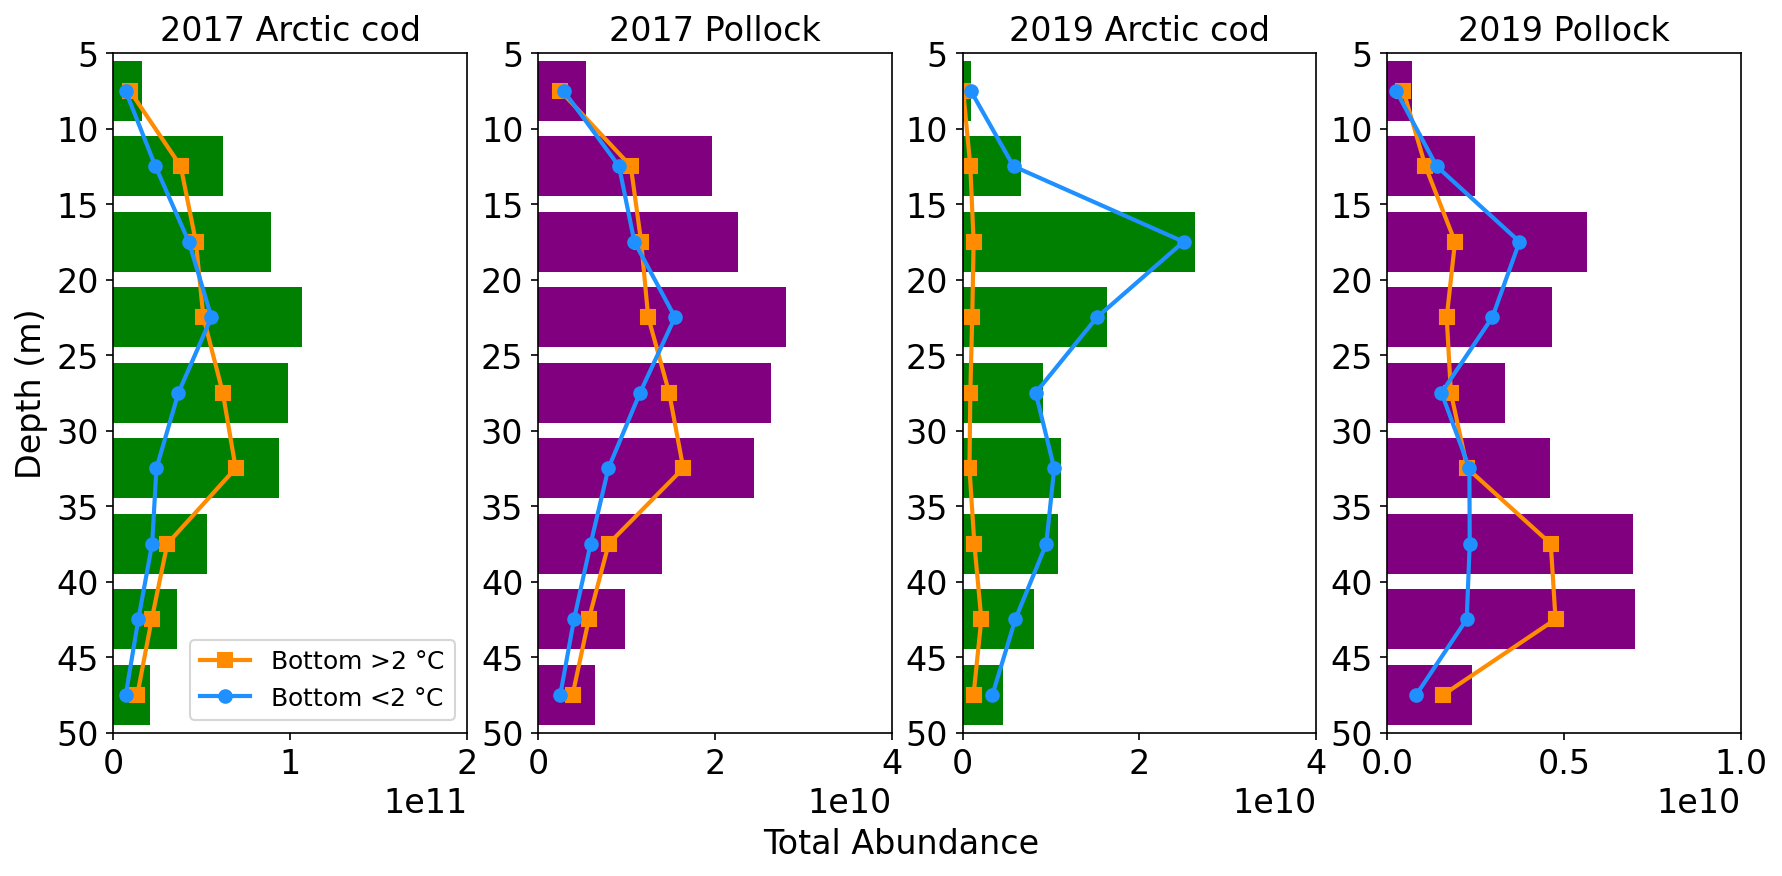

In [22]:
fig = plt.figure(figsize=(14,6),dpi=150)
plt.rcParams.update({'font.size': 16})
width = .45
temp = 2

plt.subplot(141)
df17A = df17[df17.SPECIES_CODE == 21725]
plt.barh(df17A.groupby(['LAYER']).sum().index,df17A.groupby(['LAYER']).sum().NUMBERS,color = 'green')
dfA = df17[(df17.SPECIES_CODE == 21725) & (df17.T_bot >temp)]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'s-',color = 'darkorange',linewidth=2,markersize=7)
dfA = df17[(df17.SPECIES_CODE == 21725) & (df17.T_bot <temp)]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'dodgerblue',linewidth=2,markersize=12)
plt.axis([0,2E11,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
plt.ylabel('Depth (m)')
plt.title('2017 Arctic cod',fontsize=16)
plt.legend(['Bottom >'+str(temp)+' $\degree$C','Bottom <'+str(temp)+' $\degree$C'],fontsize=12)

plt.subplot(142)
df17A = df17[df17.SPECIES_CODE == 21744]
plt.barh(df17A.groupby(['LAYER']).sum().index,df17A.groupby(['LAYER']).sum().NUMBERS,color = 'purple')
dfA = df17[(df17.SPECIES_CODE == 21744) & (df17.T_bot >temp)]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'s-',color = 'darkorange',linewidth=2,markersize=7)
dfA = df17[(df17.SPECIES_CODE == 21744) & (df17.T_bot <temp)]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'dodgerblue',linewidth=2,markersize=12)
plt.axis([0,4E10,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
#plt.ylabel('Depth (m)')
plt.title('2017 Pollock',fontsize=16)

plt.subplot(143)
df19A = df19[df19.SPECIES_CODE == 21725]
plt.barh(df19A.groupby(['LAYER']).sum().index,df19A.groupby(['LAYER']).sum().NUMBERS,color = 'green')
dfA = df19[(df19.SPECIES_CODE == 21725) & (df19.T_bot >temp)]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'s-',color = 'darkorange',linewidth=2,markersize=7)
dfA = df19[(df19.SPECIES_CODE == 21725) & (df19.T_bot <temp)]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'dodgerblue',linewidth=2,markersize=12)
plt.axis([0,4E10,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
#plt.ylabel('Depth (m)')
plt.title('2019 Arctic cod',fontsize=16)

plt.subplot(144)
df19A = df19[df19.SPECIES_CODE == 21744]
plt.barh(df19A.groupby(['LAYER']).sum().index,df19A.groupby(['LAYER']).sum().NUMBERS,color = 'purple')
dfA = df19[(df19.SPECIES_CODE == 21744) & (df19.T_bot >temp)]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'s-',color = 'darkorange',linewidth=2,markersize=7)
dfA = df19[(df19.SPECIES_CODE == 21744) & (df19.T_bot <temp)]
plt.plot(dfA.groupby(['LAYER']).sum().NUMBERS[:9],dfA.groupby(['LAYER']).sum().index[:9],'.-',color = 'dodgerblue',linewidth=2,markersize=12)
plt.axis([0,1E10,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
#plt.ylabel('Depth (m)')
plt.title('2019 Pollock',fontsize=16)

plt.subplots_adjust(wspace=0.2)
fig.text(0.5, -0.01, 'Total Abundance', ha='center')

# Split by year

Text(0.02, 0.5, 'Depth (m)')

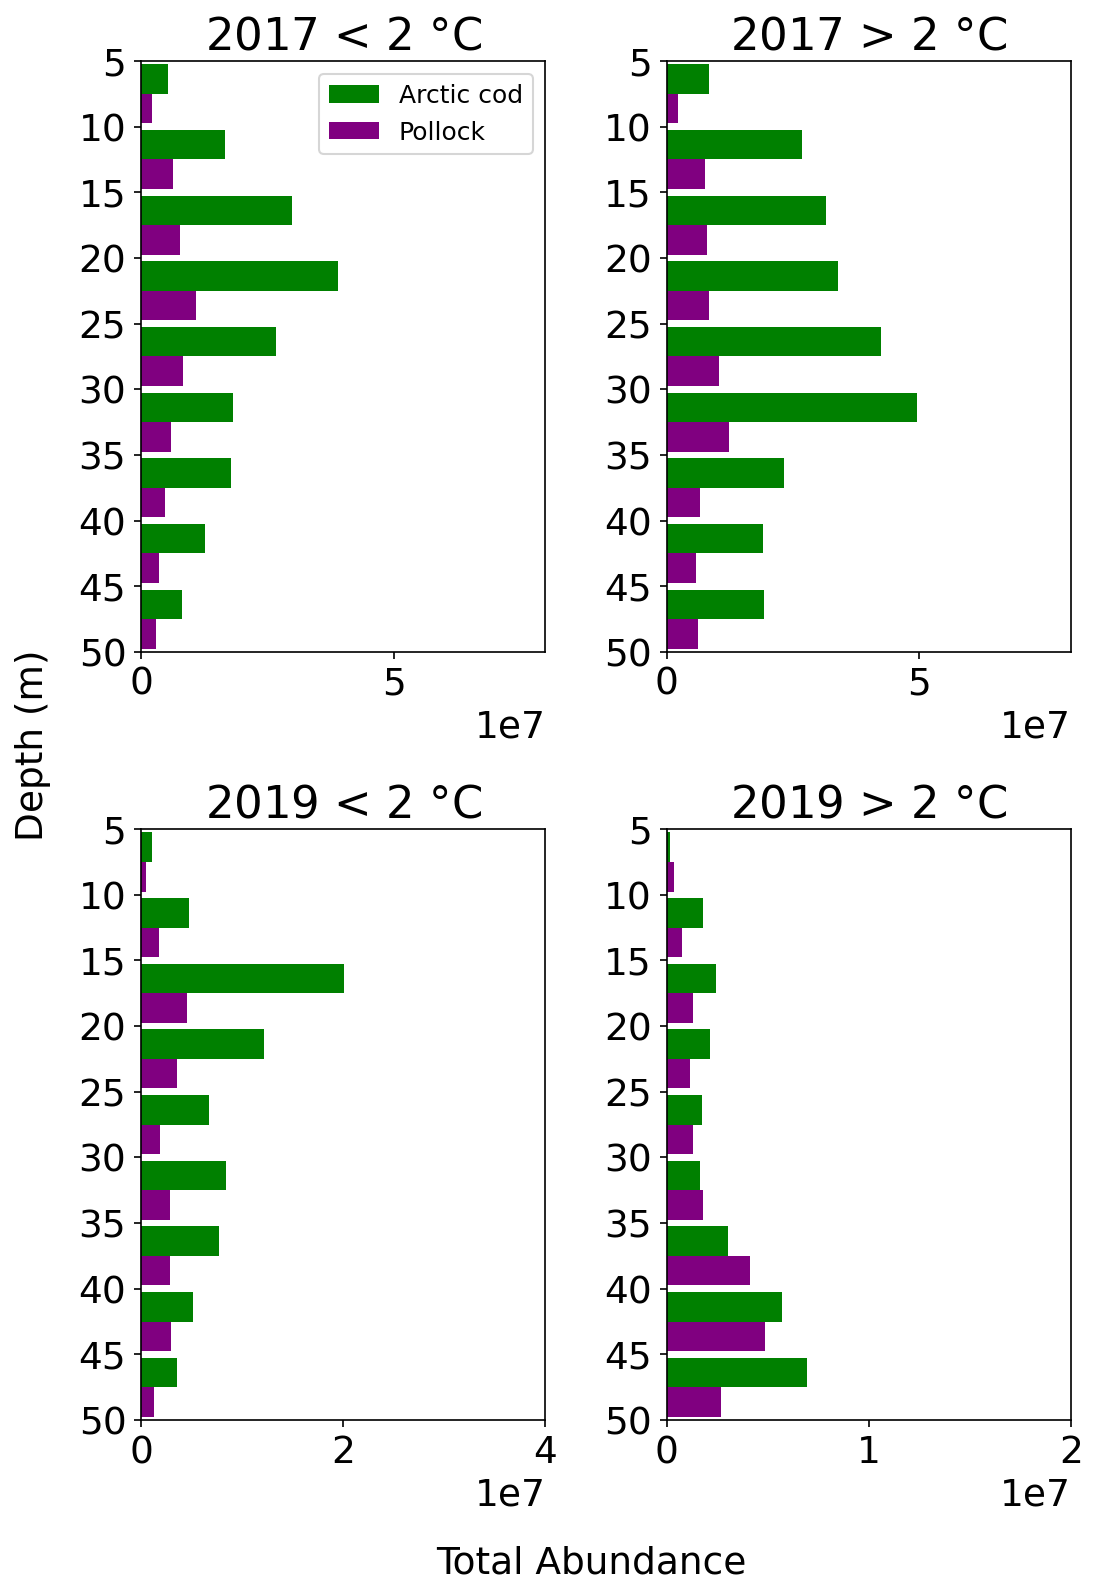

In [21]:
fig = plt.figure(figsize=(8,12),dpi=150)
plt.rcParams.update({'font.size': 18})
width = .45
temp = 2

plt.subplot(221)
df17A = df17[(df17.SPECIES_CODE == 21725) & (df17.T_bot < temp)]
plt.barh(df17A.groupby(['LAYER']).mean().index- width/2,df17A.groupby(['LAYER']).mean().NUMBERS,width,color = 'green')
df17A = df17[(df17.SPECIES_CODE != 21725) & (df17.T_bot < temp)]
plt.barh(df17A.groupby(['LAYER']).mean().index+ width/2,df17A.groupby(['LAYER']).mean().NUMBERS,width,color = 'purple')

plt.axis([0,8E7,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
plt.title('2017 < '+str(temp)+' $\degree$C')
plt.legend(['Arctic cod','Pollock'],fontsize=12)

plt.subplot(223)
df19A = df19[(df19.SPECIES_CODE == 21725) & (df19.T_bot < temp)]
plt.barh(df19A.groupby(['LAYER']).mean().index- width/2,df19A.groupby(['LAYER']).mean().NUMBERS,width,color = 'green')
df19A = df19[(df19.SPECIES_CODE != 21725) & (df19.T_bot < temp)]
plt.barh(df19A.groupby(['LAYER']).mean().index+ width/2,df19A.groupby(['LAYER']).mean().NUMBERS,width,color = 'purple')

plt.axis([0,4E7,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
plt.title('2019 < '+str(temp)+' $\degree$C')

plt.subplot(222)
df17A = df17[(df17.SPECIES_CODE == 21725) & (df17.T_bot > temp)]
plt.barh(df17A.groupby(['LAYER']).mean().index- width/2,df17A.groupby(['LAYER']).mean().NUMBERS,width,color = 'green')
df17A = df17[(df17.SPECIES_CODE != 21725) & (df17.T_bot > temp)]
plt.barh(df17A.groupby(['LAYER']).mean().index+ width/2,df17A.groupby(['LAYER']).mean().NUMBERS,width,color = 'purple')

plt.axis([0,8E7,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
plt.title('2017 > '+str(temp)+' $\degree$C')

plt.subplot(224)
df19A = df19[(df19.SPECIES_CODE == 21725) & (df19.T_bot > temp)]
plt.barh(df19A.groupby(['LAYER']).mean().index- width/2,df19A.groupby(['LAYER']).mean().NUMBERS,width,color = 'green')
df19A = df19[(df19.SPECIES_CODE != 21725) & (df19.T_bot > temp)]
plt.barh(df19A.groupby(['LAYER']).mean().index+ width/2,df19A.groupby(['LAYER']).mean().NUMBERS,width,color = 'purple')

plt.axis([0,2E7,5,10.5])
plt.gca().invert_yaxis()
plt.gca().set_yticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.gca().set_yticklabels(['5','10','15','20','25','30','35','40','45','50'])
plt.title('2019 > '+str(temp)+' $\degree$C')
plt.subplots_adjust(wspace=0.3,hspace=0.3)
fig.text(0.5, 0.04, 'Total Abundance', ha='center')
fig.text(0.02, 0.5, 'Depth (m)', va='center', rotation='vertical')